# 新北市住宅房價分析
## 1)載入dataset

下載資源：內政部不動產成交案件實際資訊資料供應系統 2017~2022房屋買賣交易




In [1]:
import pandas as pd

df_sell=pd.read_csv('newtaipei_sell.csv',encoding='utf-8')

/var/folders/dw/dqhp_ysx01s6vtxxppnxs6zh0000gn/T/ipykernel_13296/1473766359.py:3: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sell=pd.read_csv('newtaipei_sell.csv',encoding='utf-8')


## 2)資料清理

1. 刪除重複資料

In [2]:
df_sell.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342513 entries, 0 to 342528
Data columns (total 34 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   鄉鎮市區           342513 non-null  object
 1   交易標的           342513 non-null  object
 2   土地位置建物門牌       342513 non-null  object
 3   土地移轉總面積平方公尺    342513 non-null  object
 4   都市土地使用分區       317010 non-null  object
 5   非都市土地使用分區      21758 non-null   object
 6   非都市土地使用編定      21679 non-null   object
 7   交易年月日          342513 non-null  object
 8   交易筆棟數          342513 non-null  object
 9   移轉層次           296867 non-null  object
 10  總樓層數           296861 non-null  object
 11  建物型態           342513 non-null  object
 12  主要用途           296844 non-null  object
 13  主要建材           296906 non-null  object
 14  建築完成年月         288478 non-null  object
 15  建物移轉總面積平方公尺    342513 non-null  object
 16  建物現況格局-房       342513 non-null  object
 17  建物現況格局-廳       342513 non-null  object
 18  建物現況

2. 篩選出住宅(交易標的非土地且非車位，單價不可為空值，土地使用為住)，得到資料筆數為**187956**筆

In [3]:
df_resident=df_sell[(df_sell['交易標的']!='土地')&(df_sell['交易標的']!='車位')& (df_sell['單價元平方公尺'].notnull())&(df_sell['都市土地使用分區']=='住')]

In [4]:
df_resident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187956 entries, 5 to 342528
Data columns (total 34 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   鄉鎮市區           187956 non-null  object
 1   交易標的           187956 non-null  object
 2   土地位置建物門牌       187956 non-null  object
 3   土地移轉總面積平方公尺    187956 non-null  object
 4   都市土地使用分區       187956 non-null  object
 5   非都市土地使用分區      0 non-null       object
 6   非都市土地使用編定      0 non-null       object
 7   交易年月日          187956 non-null  object
 8   交易筆棟數          187956 non-null  object
 9   移轉層次           187877 non-null  object
 10  總樓層數           187906 non-null  object
 11  建物型態           187956 non-null  object
 12  主要用途           187908 non-null  object
 13  主要建材           187938 non-null  object
 14  建築完成年月         182175 non-null  object
 15  建物移轉總面積平方公尺    187956 non-null  object
 16  建物現況格局-房       187956 non-null  object
 17  建物現況格局-廳       187956 non-null  object
 18  建物現況

3. 取出所需資料欄位

In [5]:
new_df_resident=df_resident[['鄉鎮市區','土地位置建物門牌','年份','建物移轉總面積平方公尺','總價元','單價元平方公尺']]

4. 將數字string轉換資料型態為float

In [6]:
new_df_resident[['建物移轉總面積平方公尺','總價元','單價元平方公尺']]=new_df_resident[['建物移轉總面積平方公尺','總價元','單價元平方公尺']].astype('float')

/var/folders/dw/dqhp_ysx01s6vtxxppnxs6zh0000gn/T/ipykernel_13296/310703125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_resident[['建物移轉總面積平方公尺','總價元','單價元平方公尺']]=new_df_resident[['建物移轉總面積平方公尺','總價元','單價元平方公尺']].astype('float')


In [7]:
new_df_resident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187956 entries, 5 to 342528
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         187956 non-null  object 
 1   土地位置建物門牌     187956 non-null  object 
 2   年份           187956 non-null  int64  
 3   建物移轉總面積平方公尺  187956 non-null  float64
 4   總價元          187956 non-null  float64
 5   單價元平方公尺      187956 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 10.0+ MB


5. 將總價轉換以萬元表示，將單價轉換以每單位坪表示

In [8]:
new_df_resident['總價元(萬)']=new_df_resident['總價元']*0.0001
new_df_resident['單價元坪(萬)']=new_df_resident['單價元平方公尺']*3.3*0.0001

/var/folders/dw/dqhp_ysx01s6vtxxppnxs6zh0000gn/T/ipykernel_13296/2495147757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_resident['總價元(萬)']=new_df_resident['總價元']*0.0001
/var/folders/dw/dqhp_ysx01s6vtxxppnxs6zh0000gn/T/ipykernel_13296/2495147757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_resident['單價元坪(萬)']=new_df_resident['單價元平方公尺']*3.3*0.0001


6. 篩選出一般住宅的面積為**70>面積>500**

In [9]:
new_df_resident_L=new_df_resident[(new_df_resident['建物移轉總面積平方公尺']<500)&(new_df_resident['建物移轉總面積平方公尺']>70)]

In [10]:
new_df_resident_L.sort_values('建物移轉總面積平方公尺', ascending=True).head(20)

,鄉鎮市區,土地位置建物門牌,年份,建物移轉總面積平方公尺,總價元,單價元平方公尺,總價元(萬),單價元坪(萬)
228185,新店區,新北市新店區松林路６號七樓之二十四,2019,70.01,2500000.0,35709.0,250.0,11.78397
320694,新店區,新北市新店區松林路６號三樓之二十四,2017,70.01,2880000.0,41137.0,288.0,13.57521
137331,新店區,新北市新店區松林路6號7樓之18,2020,70.01,3100000.0,44279.0,310.0,14.61207
122438,新店區,新北市新店區松林路6號9樓之18,2020,70.01,2050000.0,29282.0,205.0,9.66306
104268,新店區,新北市新店區松林路６號四樓之十八,2021,70.01,3300000.0,47136.0,330.0,15.55488
141061,新店區,新北市新店區松林路６號三樓之二十四,2020,70.01,2850000.0,40708.0,285.0,13.43364
125641,新店區,新北市新店區松林路６號六樓之十八,2020,70.01,2200000.0,31424.0,220.0,10.36992
341648,三重區,新北市三重區中正南路２２９號３樓,2017,70.01,9500000.0,135714.0,950.0,44.78562
195442,新店區,新北市新店區松林路６號八樓之十九,2019,70.01,2800000.0,39994.0,280.0,13.19802
272017,蘆洲區,新北市蘆洲區長安街２６７巷１１號五樓,2018,70.01,7060000.0,100843.0,706.0,33.27819


## 3)資料EDA
1. 匯出沙盒圖顯示資料離群狀況，整個沙盒都看不到，表示有差距很大的離群值，

利用quantile()算出四分位距，取出區間。

<Axes: ylabel='總價元(萬)'>

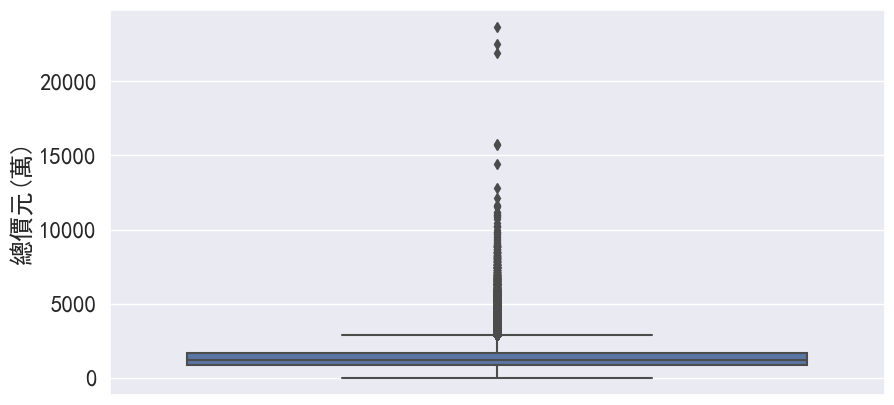

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(10,5),"font.sans-serif":'simhei'},font_scale=1.5)
sns.boxplot(y=new_df_resident_L["總價元(萬)"])

In [12]:
Q1_t=new_df_resident_L["總價元(萬)"].quantile(0.25)
Q3_t=new_df_resident_L["總價元(萬)"].quantile(0.75)
IQR_t=Q3_t-Q1_t
#Q1_p=new_df_resident["單價元坪(萬)"].quantile(0.25)
#Q3_p=new_df_resident["單價元坪(萬)"].quantile(0.75)
#IQR_p=Q3_p-Q1_p
#new_df_resident["總價元(萬)"]<(Q1-1.5*IQR)
#new_df_resident["總價元(萬)"]<(Q1-1.5*IQR)


            
new_df_resident_without=new_df_resident_L[((new_df_resident_L["總價元(萬)"]>(Q1_t-1.5*IQR_t))
                                         &(new_df_resident_L["總價元(萬)"]<(Q3_t+1.5*IQR_t)))]

In [13]:
#new_df_resident_without.info()
new_df_resident_without.sort_values('總價元(萬)', ascending=False).head(20)

,鄉鎮市區,土地位置建物門牌,年份,建物移轉總面積平方公尺,總價元,單價元平方公尺,總價元(萬),單價元坪(萬)
28612,三重區,新北市三重區成功路１０８巷５３號十六樓之一,2022,181.68,28470000.0,180085.0,2847.0,59.42805
57057,板橋區,新北市板橋區環河西路四段２２３３號十五樓,2022,205.12,28460000.0,160546.0,2846.0,52.98018
119416,新店區,新北市新店區中山路１０號十四樓,2021,177.42,28460000.0,179811.0,2846.0,59.33763
194880,新店區,新北市新店區中華路43號14樓,2019,168.65,28460000.0,193657.0,2846.0,63.90681
152970,樹林區,新北市樹林區學勤路255號五樓,2020,303.69,28458000.0,93707.0,2845.8,30.92331
45204,永和區,新北市永和區仁愛路３０６巷２號十樓之１,2022,190.28,28450000.0,170079.0,2845.0,56.12607
57171,板橋區,新北市板橋區環河西路四段２２３３號十六樓,2022,205.12,28450000.0,161094.0,2845.0,53.16102
144649,新莊區,新北市新莊區福德二街６號八樓,2020,274.17,28450000.0,123720.0,2845.0,40.82760
245317,三重區,新北市三重區仁昌街１２號十一樓,2018,179.15,28440000.0,171550.0,2844.0,56.61150
296332,蘆洲區,新北市蘆洲區中正路２４３巷１號七樓之二,2017,238.34,28430000.0,127818.0,2843.0,42.17994


<Axes: ylabel='總價元(萬)'>

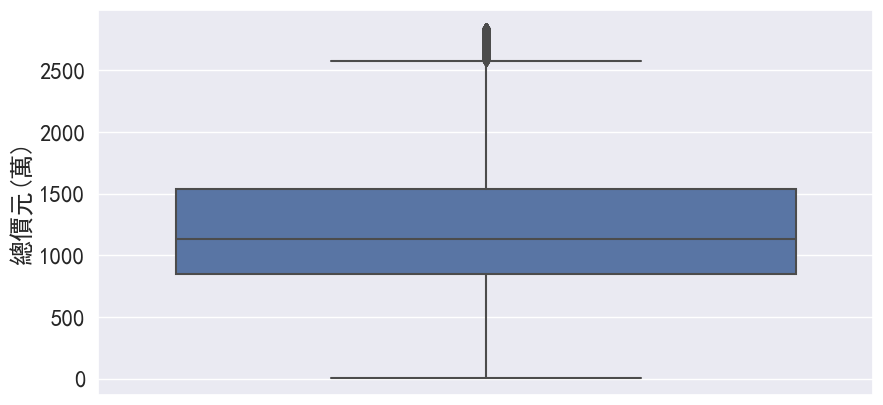

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=new_df_resident_without["總價元(萬)"])
#sns.boxplot(y=new_df_resident_without["單價元坪(萬)"])

2. 繪出直方圖檢視數值是否近於常態分佈，數值顯示右偏：眾數＜中位數＜平均數

<Axes: xlabel='總價元(萬)', ylabel='Count'>

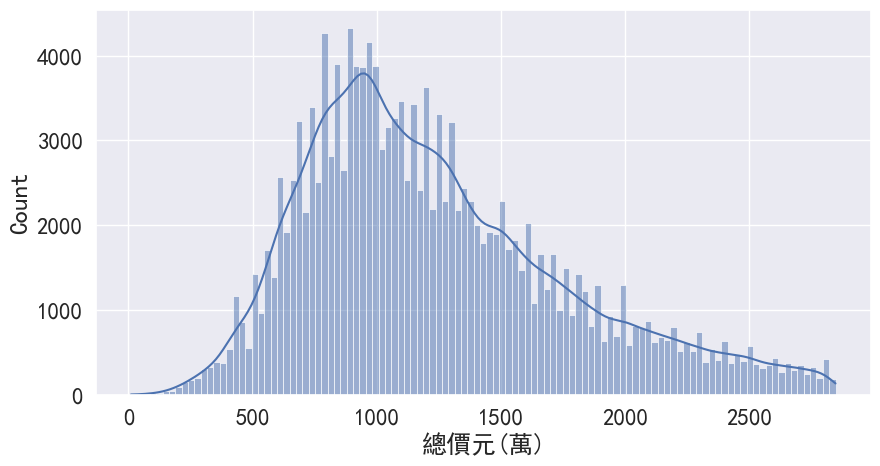

In [18]:
sns.histplot(data=new_df_resident_without,x="總價元(萬)",kde=True)

## 4)資料視覺化 ＃將利用視覺化圖表呈現下列資料


1. 哪一個行政區的交易件數最多？
2. 本次研究對象林口區交易件數多寡？與相近交易數行政區比較
3. 與相近行政區比較年度交易數變化
4. 比較相近的四個行政區逐年房價變化

In [19]:
df_resident_case=new_df_resident_without.groupby(['鄉鎮市區']).size().reset_index(name="件數").sort_values('件數', ascending=False)

In [20]:
df_resident_case

,鄉鎮市區,件數
11,板橋區,20033
17,淡水區,19327
10,新莊區,15290
3,中和區,13387
12,林口區,10361
15,汐止區,10326
9,新店區,10170
2,三重區,10046
6,土城區,8602
24,蘆洲區,6245


1. 哪一個行政區的交易件數最多？ 

  - 板橋區交易件數最多6年內有**20033**件



2. 本次研究對象林口區交易件數多寡？與相近交易數行政區比較

  - 林口區交易數為新北市排第五，與汐止區、新店區、三重區相近交易數約在**10000**筆 

<Axes: xlabel='鄉鎮市區', ylabel='件數'>

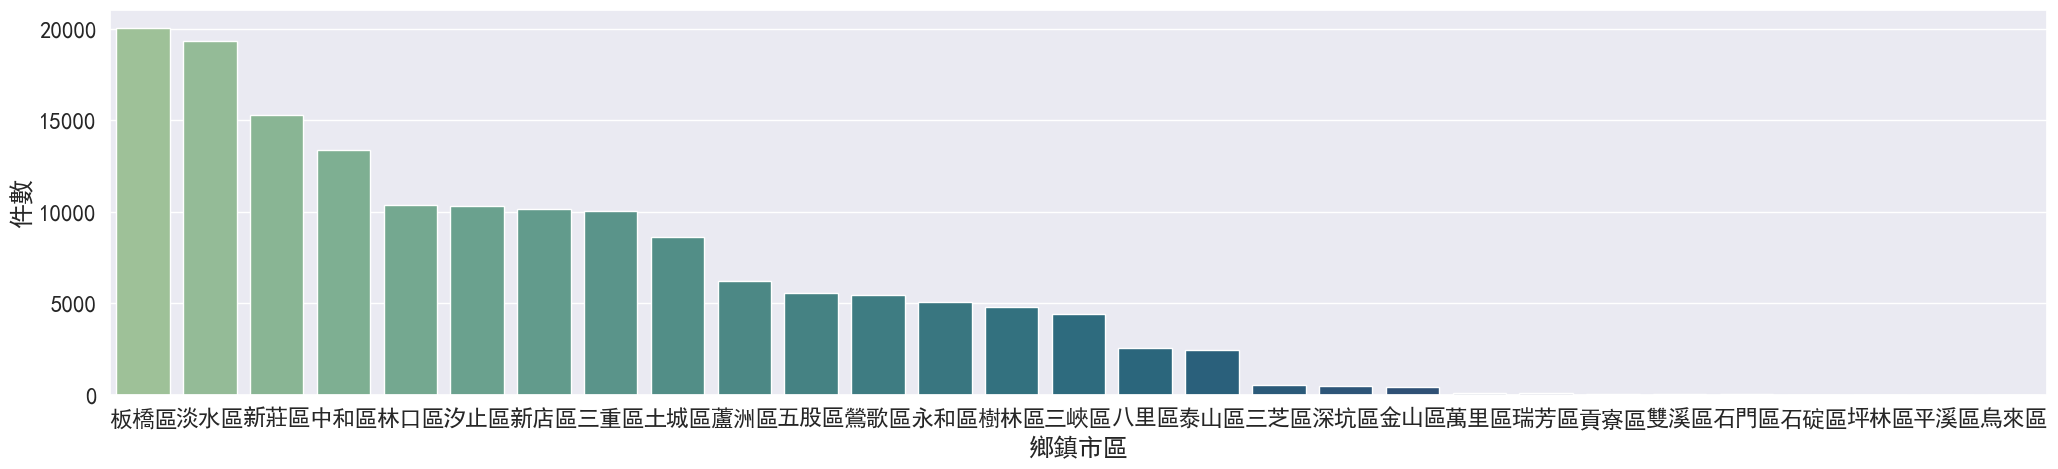

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(25,5),"font.sans-serif":'simhei'},font_scale=1.5)

sns.barplot(x="鄉鎮市區",y="件數",data=df_resident_case,errorbar=None,palette=sns.color_palette("crest",23))

In [22]:
new_df_year=new_df_resident_without.groupby(['鄉鎮市區','年份']).size().reset_index(name="件數").sort_values('件數', ascending=False)

In [23]:
new_df_year

,鄉鎮市區,年份,件數
58,板橋區,2018,5530
93,淡水區,2017,4500
95,淡水區,2019,3808
62,板橋區,2022,3498
57,板橋區,2017,3424
...,...,...,...
116,石碇區,2021,1
105,烏來區,2019,1
42,坪林區,2020,1
43,坪林區,2021,1


3. 與相近行政區比較年度交易數變化
- 以板橋區作為大盤比較，林口區呈現與大盤相近的曲線2018年及2022年皆上升
- 2018年為林口區的交易高峰期，2022年三重區及新店區則超越林口區呈現高成長

<Axes: xlabel='年份', ylabel='件數'>

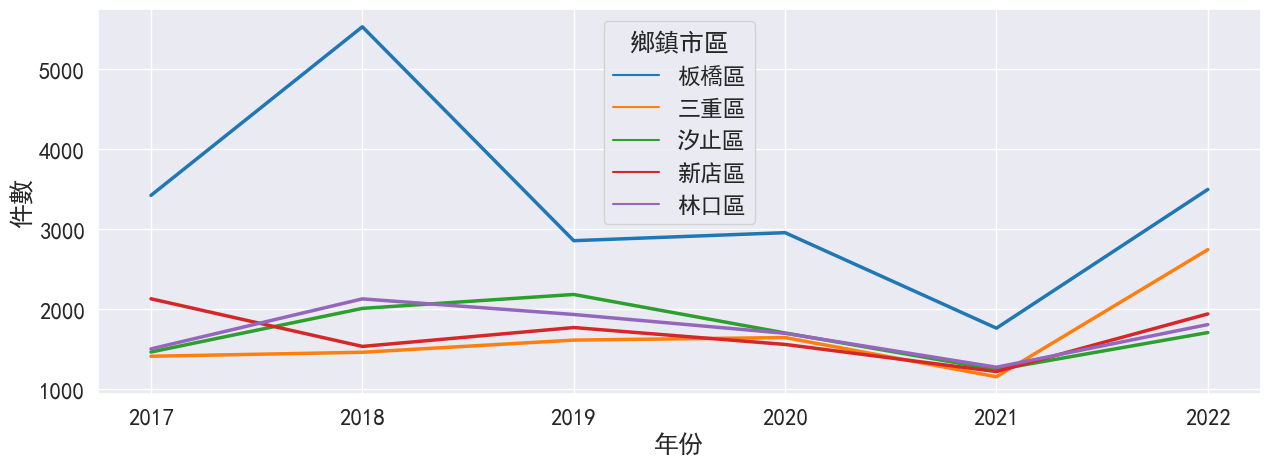

In [24]:
sns.set(rc = {'figure.figsize':(15,5),"font.sans-serif":'simhei'},font_scale=1.5)
sns.lineplot(data=new_df_year[(new_df_year['鄉鎮市區']=='板橋區')|(new_df_year['鄉鎮市區']=='林口區')|(new_df_year['鄉鎮市區']=='汐止區')|(new_df_year['鄉鎮市區']=='新店區')|(new_df_year['鄉鎮市區']=='三重區')],x="年份", y='件數',hue="鄉鎮市區", palette="tab10", linewidth=2.5)

In [25]:
new_df_resident_without.groupby(['鄉鎮市區']).mean().sort_values('單價元坪(萬)', ascending=False)

/var/folders/dw/dqhp_ysx01s6vtxxppnxs6zh0000gn/T/ipykernel_13296/1003203418.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df_resident_without.groupby(['鄉鎮市區']).mean().sort_values('單價元坪(萬)', ascending=False)


,年份,建物移轉總面積平方公尺,總價元,單價元平方公尺,總價元(萬),單價元坪(萬)
鄉鎮市區,,,,,,
永和區,2019.389904,111.947075,1.464082e+07,134523.173443,1464.082029,44.392647
新店區,2019.396853,127.036416,1.478717e+07,123035.237365,1478.716974,40.601628
中和區,2019.458505,119.115517,1.394957e+07,121710.820497,1394.957060,40.164571
三重區,2019.787378,120.506551,1.375554e+07,119280.742982,1375.553511,39.362645
平溪區,2020.000000,84.300000,1.000000e+07,118624.000000,1000.000000,39.145920
板橋區,2019.229821,123.641637,1.294787e+07,112573.892178,1294.787223,37.149384
新莊區,2019.373839,128.189680,1.316171e+07,108290.344931,1316.171466,35.735814
土城區,2019.704371,125.375212,1.274184e+07,106255.988375,1274.184117,35.064476
蘆洲區,2019.422578,123.757712,1.279631e+07,106161.520096,1279.630866,35.033302


4. 比較相近的四個行政區逐年房價變化
- 林口區相較其他行政區為單價最低的區域，新店區最高
- 以總價而言2018～2021年，消費者願意花相同的總價在林口區購買單價較低的房子

In [26]:
df_data=new_df_resident_without[(new_df_resident_without['鄉鎮市區']=='三重區')|(new_df_resident_without['鄉鎮市區']=='汐止區')|(new_df_resident_without['鄉鎮市區']=='林口區')|(new_df_resident_without['鄉鎮市區']=='新店區')]

In [27]:
df_data.sort_values('單價元坪(萬)', ascending=False).head(10)

,鄉鎮市區,土地位置建物門牌,年份,建物移轉總面積平方公尺,總價元,單價元平方公尺,總價元(萬),單價元坪(萬)
147023,汐止區,新北市汐止區大同路二段２２６號,2020,78.33,26000000.0,331929.0,2600.0,109.53657
50119,新店區,新北市新店區中興路一段１８４號,2022,75.51,25000000.0,331082.0,2500.0,109.25706
188257,新店區,新北市新店區博愛街１３巷２１號,2019,72.34,23586000.0,326044.0,2358.6,107.59452
242032,林口區,新北市林口區文化三路一段６１１號,2018,113.59,27500000.0,322019.0,2750.0,106.26627
38626,新店區,新北市新店區二十張路２５巷４號,2022,87.96,28000000.0,318327.0,2800.0,105.04791
108544,新店區,新北市新店區寶橋路８５巷５１號,2021,86.75,27500000.0,317003.0,2750.0,104.61099
18403,三重區,新北市三重區長壽街１０５之１號,2022,81.12,25600000.0,315582.0,2560.0,104.14206
260888,林口區,新北市林口區文化三路二段５９號,2018,70.35,15170000.0,314025.0,1517.0,103.62825
28306,新店區,新北市新店區北新路三段６５巷１２弄１１號,2022,71.16,22000000.0,309162.0,2200.0,102.02346
141978,新店區,新北市新店區民族路１５號,2020,111.04,23600000.0,307473.0,2360.0,101.46609


In [ ]:
df_data.groupby(['鄉鎮市區','年份']).mean()

<Axes: xlabel='年份', ylabel='單價元坪(萬)'>

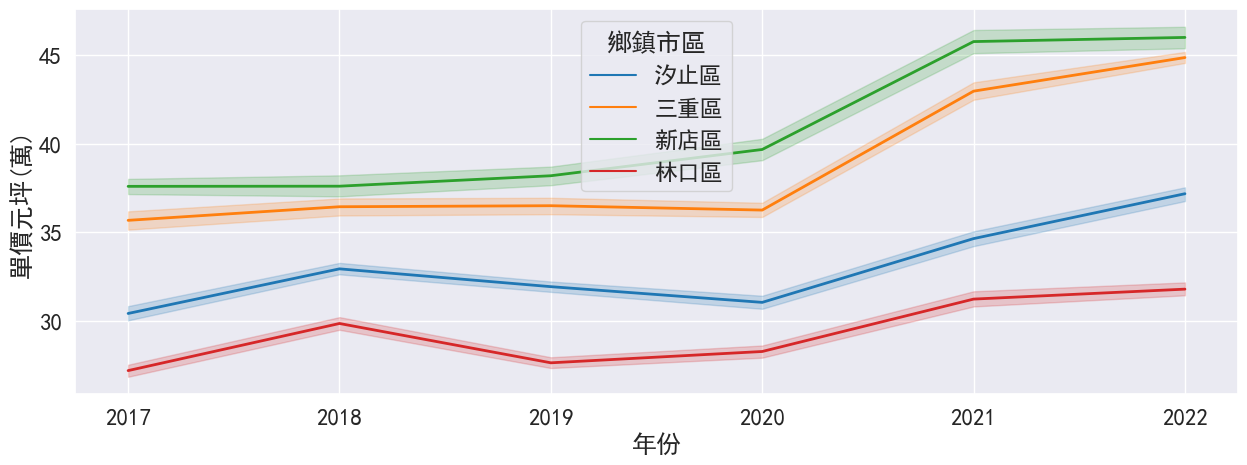

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15,5),"font.sans-serif":'simhei'},font_scale=1.5)
sns.lineplot(data=df_data,x="年份", y="單價元坪(萬)",hue="鄉鎮市區", palette="tab10", linewidth=2)

<Axes: xlabel='年份', ylabel='總價元(萬)'>

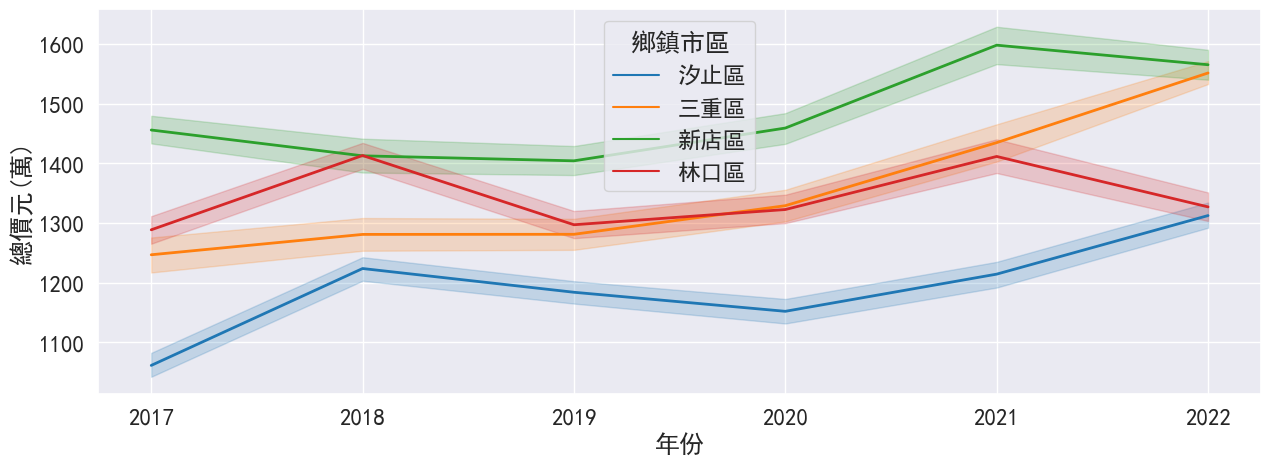

In [29]:
sns.set(rc = {'figure.figsize':(15,5),"font.sans-serif":'simhei'},font_scale=1.5)
sns.lineplot(data=df_data,x="年份", y="總價元(萬)",hue="鄉鎮市區", palette="tab10", linewidth=2)

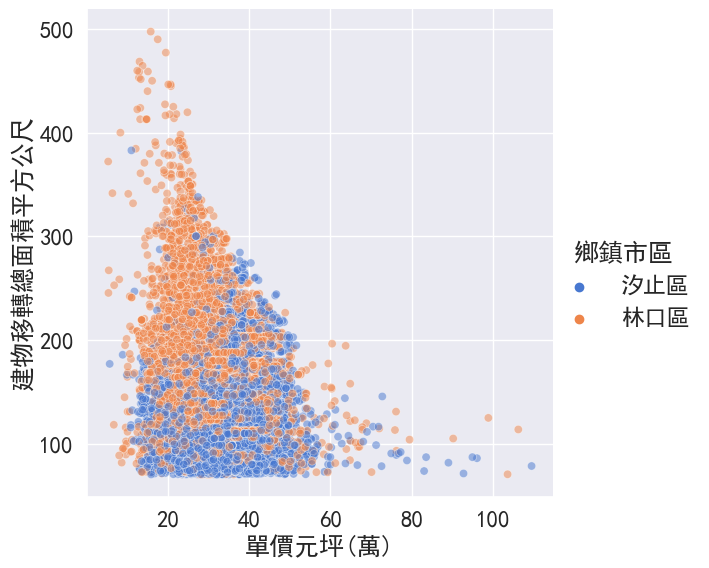

In [33]:
sns.relplot(x="單價元坪(萬)", y="建物移轉總面積平方公尺", hue="鄉鎮市區", 
            sizes=(40, 40), alpha=.5, palette='muted',
            height=6, data=new_df_resident_without[(new_df_resident_without['鄉鎮市區']=='汐止區')|(new_df_resident_without['鄉鎮市區']=='林口區')])

## 結論
- 2018年林口區出現一波購屋的高潮，消費者願意用較低的單價購買總價較高的房子，林口區為大坪數購屋者的選擇
- 在比較的四個行政區中，汐止區與林口區同為新北市無台北捷運可到達的區域交通機能較低，房價也相對較低，但相對於汐止區消費者傾向在林口購買坪數較大的物件
- 2021年出現一波房價上漲，三重區出現最明顯的漲幅並於2022年交易數飆升，預估三重區也將會出現一波移入人口